In [49]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [50]:
class Perceptron(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.flag = True
        self.updates = 0;
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data):
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        
        while self.flag:
            self.flag = True
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    self.updates += 1
                    self.flag = False
                    
            if self.flag:
                break
            else:
                self.flag = True


In [51]:
x = 0.2
upadteArr = []
sepArr = []
while (x<5.2):
    top,bottom = generatedata(rad,thk,x,1000)
    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]

    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]
    
    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2
    
    data = np.array(data)
    np.random.shuffle(data)
    perceptron = Perceptron(data)
    perceptron.fit(data)
    upadteArr.append(perceptron.updates)
    sepArr.append(x)
    x+=0.2


# Plot of sep vs number of iterations

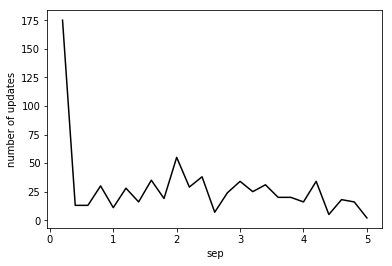

In [52]:
import matplotlib.pyplot as plt
plt.plot(sepArr,upadteArr,  color='black', linestyle='-', label='g(x)')
plt.xlabel("sep");
plt.ylabel("number of updates");
plt.show()